# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb


In [2]:
# leer conjuntos de datos en los DataFrames
data = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
prod = pd.read_csv('/datasets/products.csv', sep=';')
aisl = pd.read_csv('/datasets/aisles.csv', sep=';')
depto = pd.read_csv('/datasets/departments.csv', sep=';')
order = pd.read_csv('/datasets/order_products.csv', sep=';')


In [3]:
# mostrar información del DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
prod.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
depto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
order.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Leyendo los archivos podemos ver que se trata de archivos grandes, con muchisimos datos por procesar ya que la mayoria son enteros y vamos a necesitar manipularlos, asi como vamos a necesitar desarsernos de varios de algunos datos, ya sea elimandolos o rellandolos. #Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Mi plan para el procesamiento de datos es ir aplicando todas las formulas y opciones que nos ensenaron en el sprint asi como tambien utilizar la materia de sprints pasados para poder obtener todos los datos correctamente. #Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
data.duplicated().sum()
print(data[data.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Si, tenemos lineas duplicadas, son 15 en total y lo que tienen en comun es que todas fueron hechas el miercoles a las 2 am #¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
data[(data['order_dow']==3) & (data['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Tenemos 121 filas en donde hay solo 15 duplicadas el miercoles a las 2am, lo que quiere decir que pudo ser un simple error del sistema.#¿Qué sugiere este resultado?

In [59]:
# Elimina los pedidos duplicados
data = data.drop_duplicates().reset_index(drop=True)
print(sin_duplicados)

         index  order_id  user_id  order_number  order_dow  order_hour_of_day  \
0            0   1515936   183418            11          6                 13   
1            1   1690866   163593             5          5                 12   
2            2   1454967    39980             4          5                 19   
3            3   1768857    82516            56          0                 20   
4            4   3007858   196724             2          4                 12   
...        ...       ...      ...           ...        ...                ...   
478947  478962   3210681     5617             5          1                 14   
478948  478963   3270802   112087             2          3                 13   
478949  478964    885349    82944            16          2                 11   
478950  478965    216274     4391             3          3                  8   
478951  478966   2071924     1730            18          1                 14   

        days_since_prior_or

In [11]:
# Vuelve a verificar si hay filas duplicadas
data.duplicated().sum()

15

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
data['order_id'].duplicated().sum()

15

Se puede ver que los 15 duplicados que todavia tenemos corresponden a la columna de order id porque ya se habian eliminado previamente los duplicados que teniamos el miercoles a las 2am. 
#Describe brevemente tus hallazgos y lo que hiciste con ellos

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
prod.duplicated().sum()

0

In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
prod['product_id'].duplicated().sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
prod['product_name']=prod['product_name'].str.upper()
print(prod[prod.duplicated(subset= 'product_name')])

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

prod[(~prod['product_name'].isna())&(prod['product_name'].duplicated())]


,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Podemos ver que si hay nombres duplicados de productos en varios departamentos #Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
depto.duplicated().sum()

0

In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
depto['department_id'].duplicated().sum()

0

En el dataframe de departamentos no tenemos ningun valor duplicado. #Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisl.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
aisl['aisle_id'].duplicated().sum()

0

Tampoco tenemos filas duplicadas en el dataframe de aisle, lo que nos quiere decir que si contamos con un ID diferente por cada pasillo de la aplicacion. 
#Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order[order.duplicated(subset= 'order_id')]


,order_id,product_id,add_to_cart_order,reordered
367,2867619,48094,9.0,0
824,844425,39408,10.0,1
1124,3319857,37067,19.0,0
1258,1038788,12471,14.0,0
1303,2825714,44632,16.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


En el dataframe de order podemos ver que no hay ningun valor duplicado.
#Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(prod['product_name'].value_counts(dropna=False))


NaN                                                         1258
GREEN TEA WITH GINSENG AND HONEY                               3
ORIGINAL CHILI CON CARNE WITH BEANS                            2
TOP THE TATER CHIVE & ONION SOUR CREAM                         2
POTATOES O'BRIEN WITH ONIONS AND PEPPERS                       2
                                                            ... 
MANGO SUPER PROTEIN SMOOTHIE                                   1
ORGANIC RICE VEGETABLE TWISTS PASTA                            1
SENSITIVE FACIAL CLEANSER                                      1
MEDIUM ROAST EXTRA BOLD DECAFFEINATED K CUP COFFEE PACKS       1
100% JUICE NO SUGAR ADDED FRUIT PUNCH                          1
Name: product_name, Length: 48333, dtype: int64


Encontramos que tenemos una gran cantidad de productos y que la mayoria aparece solo una vez aunque tambien encontramos 1258 NaNs en esa columna pero comparado a la cantidad de datos que tenemos ahi, no representa tanto del procentaje.  #Describe brevemente cuáles son tus hallazgos.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
pasillo = prod[(prod['product_name'].isna()) & (prod['aisle_id'] == 100)]
print(pasillo)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Aca podemos ver que si, todos los productos faltantes tiene que ver con el pasillo 100 por lo que debe haber algo mal ahi, tal vez alguien elimino todos los productos o tal vez solo hay un pasillo de mas que deberia ser eliminado. #Describe brevemente cuáles son tus hallazgos.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
prod[(prod['product_name'].isna()) & (prod['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Tambien podemos ver que todos los productos ausentes se encuentran en el departamento 21, tendriamos que investigar que fue lo que paso con el departamento y el encargado de subir todos los productos dependiendo de su departamento. #Describe brevemente cuáles son tus hallazgos.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(depto[depto['department_id']==21]['department'])
display(aisl[aisl['aisle_id']==100]['aisle'])

20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object

Podemos ver que en el departamento 21 tenemos 20 datos perdidos por lo que debe ser que fueron articulos que se quitaron de la plataforma tal vez porque los dejaron de vender y en el pasillo 100 encontramos 99 articulos que faltan posiblemente hay algo mal en ese pasillo y esta de mas, por lo que seria bueno que lo remuevan. #Describe brevemente cuáles son tus hallazgos.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
prod['product_name'].fillna('Unknown')
print(prod.head())

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


En este caso es mejor rellenar los articulos ausentes y no eliminarlos ya que de esta manera podemos ver la informacion mas original y sacar nuevas hipotesis tomando en cuanto los articulos o los datos que estan ausentes. #Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
data.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
not_first_order = data[data['order_number']!=1]
not_first_order['days_since_prior_order'].isna().sum()

0

Podemos ver que no tenemos valores ausentes que no sean el primer pedido, lo que nos dice es que si se registran bien las veces que el cliente decide no pedir mas comida. #Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order[order['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order['add_to_cart_order'].min())
print(order['add_to_cart_order'].max())

1.0
64.0


En este caso encontramos que el minimo de pedidos es 1 y el maximo es 64 por lo que vemos que no hay pedidos con mas de 64 productos. #Describe brevemente cuáles son tus hallazgos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
miss_item = sorted(list(order[order['add_to_cart_order'].isna()]['order_id'].unique()))
print(miss_item)

[9310, 61355, 102236, 129627, 165801, 171934, 180546, 264710, 293169, 388234, 404157, 678116, 733526, 747668, 813364, 844733, 854647, 871281, 888470, 903110, 936852, 1021563, 1038146, 1169835, 1183255, 1220886, 1302315, 1308785, 1386261, 1477139, 1529171, 1564093, 1598369, 1625713, 1633337, 1648217, 1673227, 1677118, 1713430, 1717990, 1730767, 1800005, 1832957, 1888628, 1916118, 1959075, 1961723, 1968313, 2094761, 2136777, 2170451, 2256933, 2409109, 2449164, 2470674, 2479011, 2621907, 2625444, 2652650, 2721963, 2729254, 2849370, 2926893, 2979697, 2997021, 2999801, 3125735, 3308010, 3347453, 3383594]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_values =order[order['order_id'].isin(miss_item)].groupby('order_id')
orders_values['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order ['add_to_cart_order'] = order['add_to_cart_order'].fillna(999).astype('int')
order.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Aqui lo que hacemos es rellenar los valores ausentes y no eliminarlos para poder trabajar mejor con los datos originales y descrubrir que paso con esos valores que ya no estan #Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Como conclusion podemos decir que en este paso 2 hicimos todo el procesamiento de los datos para poder trabajar con informacion mas certera y asimismo descrubir si hay algun tipo de problema o si hay informacion que haga falta en el dataframe que estemos trabajando asi como tambien poder decidir que es lo mejor, si eliminar, rellenar o buscar otro dataframe para poder encontrar la informacion faltante o tambien para ver si estamos trabajando con muchos duplicados y descubrir la manera de utilizarlos mejor. #Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
data['order_hour_of_day'].unique()


array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [36]:
data['order_dow'].unique()

array([6, 5, 0, 4, 3, 1, 2])

Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Pedidos segun la hora'}, xlabel='hora del dia', ylabel='Numero de personas'>

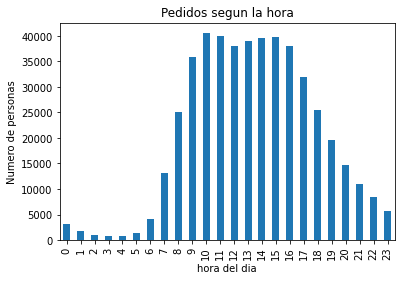

In [37]:
usuarios_por_hora = data.groupby('order_hour_of_day')['user_id'].count()
usuarios_por_hora.plot(kind='bar',title='Pedidos segun la hora', ylabel='Numero de personas', xlabel='hora del dia')

Con este grafico podemos ver que la mayor cantidad de pedidos se hacen entre las 9 am y las 5 de la tarde. #Escribe aquí tus conclusiones

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Compras por dias de la semana'}, xlabel='Dia de la semana', ylabel='Numero de personas'>

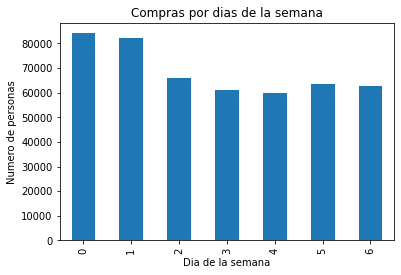

In [38]:
usuarios_viveres= data.groupby('order_dow')['user_id'].count()
usuarios_viveres.plot(kind='bar',title='Compras por dias de la semana', ylabel='Numero de personas',xlabel='Dia de la semana')

Aqui se muestra que la mayor cantidad de compras se hacen entre domingo y lunes ya que a las personas les gusta iniciar la semana preparados asi como tambien los domingos si esperan visitas pueden tener las cosas a mano para hacer una cena o cualquier otra comida. #Escribe aquí tus conclusiones

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

2640 51338


<AxesSubplot:title={'center':'Dias transcurridos desde el primer pedido'}, xlabel='Numero de dias', ylabel='Numero de pedidos'>

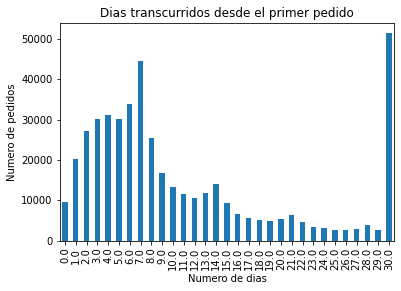

In [39]:
tiempo_pedidos = data['days_since_prior_order'].value_counts().sort_index()
print(tiempo_pedidos.min(),tiempo_pedidos.max())
tiempo_pedidos.plot(kind='bar', title='Dias transcurridos desde el primer pedido', ylabel='Numero de pedidos', xlabel='Numero de dias')

Este grafico nos muestra que la mayor cantidad de personas suele comprar una vez al mes en esta plataforma pero tambien hay una buena cantidad de gente que compra por esta plataforma cada 8 dias, posiblemente les parezca mejor tener comida nueva cada semana.  #Escribe aquí tus conclusiones

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
horas_miercoles = data[data['order_dow']==3]['order_hour_of_day'].value_counts().sort_index()
horas_sabados = data[data['order_dow']==6]['order_hour_of_day'].value_counts().sort_index()


In [41]:
horas_dias = pd.concat([horas_miercoles, horas_sabados], axis=1)
horas_dias.columns = ['miercoles','sabado']

In [42]:
horas_dias

,miercoles,sabado
0,373,464
1,215,254
2,121,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


<AxesSubplot:title={'center':'Diferencias entre pedidos miercoles y sabados'}, xlabel='Horas del dia', ylabel='Numero de personas'>

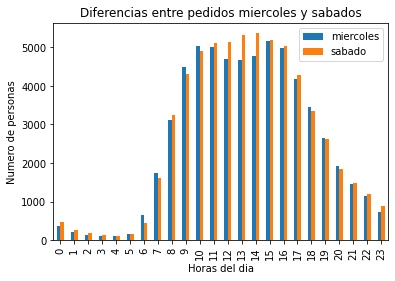

In [43]:
horas_dias.plot(kind='bar',title='Diferencias entre pedidos miercoles y sabados', ylabel='Numero de personas',xlabel='Horas del dia')

Aca podemos ver que no existe mucha diferencia entre los pedidos de estos dos dias, las personas suelen hace la misma cantidad de pedidos miercoles y sabado pero si se puede ver que durante las horas de la tarde si se hacen un poco mas de pedidos los sabados. #Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
numero_pedidos_por_cliente= data.groupby('order_number')['user_id'].count()

<AxesSubplot:title={'center':'Distribucion de pedidos del cliente'}, xlabel='Numero de ordenes', ylabel='Numero de personas'>

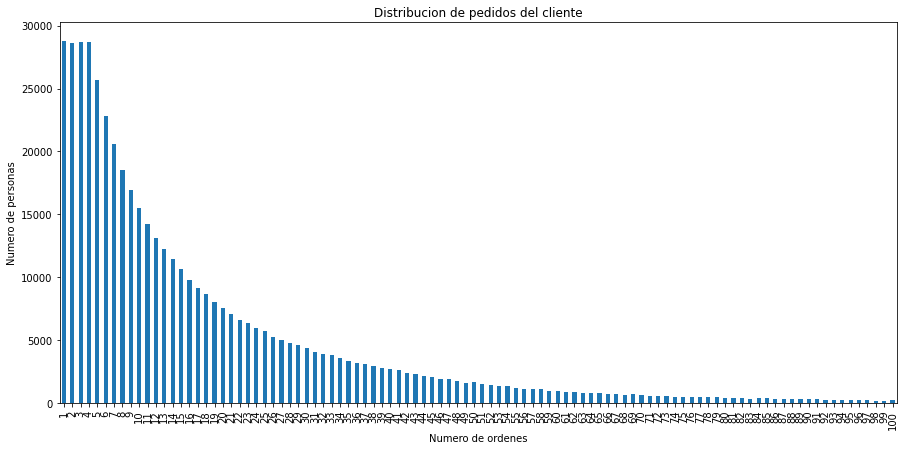

In [45]:
numero_pedidos_por_cliente.plot(kind='bar',figsize=[15,7],title='Distribucion de pedidos del cliente', ylabel='Numero de personas',xlabel='Numero de ordenes')

En este grafico podemos ver que las personas que usan esta plaforma historicamente no hacen muchos pedidos, la mayoria se encontra entre 1 y 8 o 10 pedidos. #Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
productos_populares = order.merge(prod, on='product_id')

In [47]:
productos_populares.groupby(['product_id','product_name'])['product_name'].count().sort_values(ascending=False).head(20)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: product_name, dtype: int64

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
compras_productos = order.groupby('order_id')['product_id'].count().value_counts().sort_index()

In [49]:
compras_productos

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64

<AxesSubplot:title={'center':'Articulos comprados en un pedido'}, xlabel='Numero de articulos', ylabel='Numero de pedidos'>

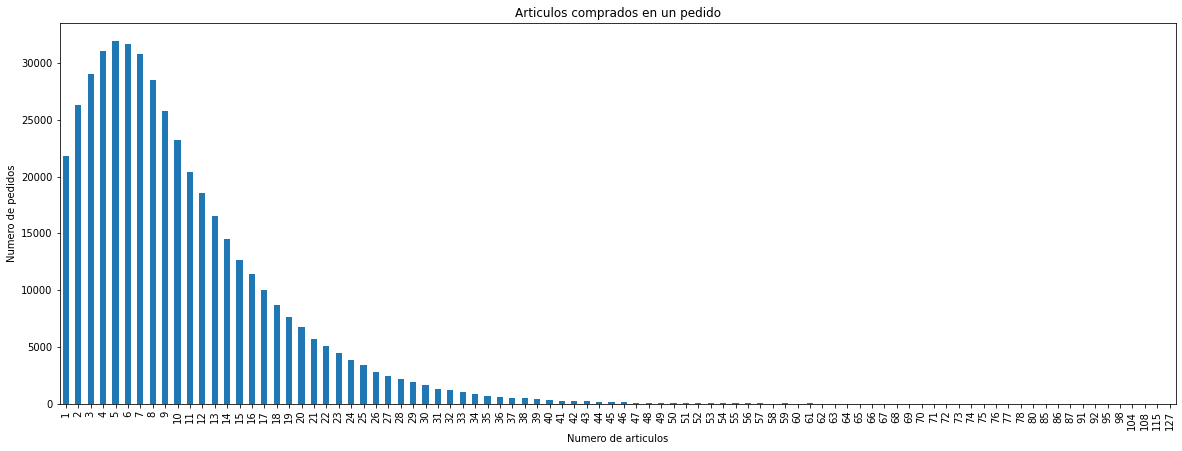

In [50]:
compras_productos.plot(kind='bar',title='Articulos comprados en un pedido',ylabel='Numero de pedidos', xlabel='Numero de articulos', figsize=[20,7])

Aca podemos ver que la mayoria de personas compra pocos articulos en en los pedidos posiblemente por que usan la plataforma para cosas especificas o para emergencias. #Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
order_productos = order.merge(prod,on='product_id')

In [52]:
productos_mas_pedidos = order_productos [order_productos['reordered']== 1].groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
print(productos_mas_pedidos.head(20))

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64


Aca lo que vemos es que los articulos que se piden con mayor frecuencia son frutas lo mas probable sea porque son las que se gastan o se descomponen mas rapido por lo que la gente las compra con mayor frecuencia. #Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
veces_que_piden = order.merge(prod, on='product_id')

In [54]:
veces_que_piden.groupby(['product_id','product_name'])['reordered'].mean()

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [55]:
productos_por_cliente = order.merge(data, on='order_id')

In [56]:
productos_por_cliente.groupby(['order_id','user_id'])['reordered'].mean()

order_id  user_id
4         178520     0.923077
9         139016     0.666667
11        143742     1.000000
19        83009      1.000000
20        182912     0.000000
                       ...   
3421034   130508     1.000000
3421053   32775      1.000000
3421071   124485     0.200000
3421077   107102     0.000000
3421079   108687     0.000000
Name: reordered, Length: 450046, dtype: float64

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [64]:
primeros_articulos = order_productos[order_productos['add_to_cart_order']==1].groupby('product_name')['product_id'].count().sort_values(ascending=False).head(20)

In [65]:
primeros_articulos.head(20)

product_name
BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
ORGANIC YELLOW ONION            1246
Name: product_id, dtype: int64

Descubrimos que los primeros articulos que las personas ponen en sus carritos son articulos para cafe asi como cosas frias como las bebidas  el yogurt. #Escribe aquí tus conclusiones

### Conclusion general del proyecto:
como conclusion de este proyecto, podemos decir que lo usuarios de esta plataforma son muy similares en cuanto los motivos porque la utilizan, que por lo general son para hacer compras de alimentos para el hogar, pudimos descubrir la mayoria de usuarios no compran mas 15 productos, asi como los dias preferidos para pedir son los fines de semana o los primeros dias de las semana, tambien notamos que muchos utilizan la plataforma para comprar una vez al mes y algunos poco con mas frecuencia como cada 8 dias. Otra cosa que se puede ver que las verduras son las que se piden con mayor frecuencia y lo primero que ponen en sus carritos es la carne. En general es una plataforma bastante utilizada y gracias a todos estos datos logramos sacar todas estas conclusiones. 

#### 